# Makemore Video 1

## Setting up the data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn.functional as F

In [2]:
names = open('names.txt','r').read().splitlines()

In [3]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(names)

32033

## Counting Bigrams 

In [6]:
bigrams = {}
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram,0) + 1

In [27]:
bigrams

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [6]:
bigrams[('s','e')]

884

In [7]:
sorted(bigrams.items(),key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [3]:
chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i+1:s for i,s in enumerate(chars)}
itos[0] = '.'

In [9]:
itos[0]

'.'

## Bigram Model in Torch

In [8]:
import torch

In [10]:
N = torch.ones((27,27), dtype=torch.int32) # Using ones here instead of zero to avoid inf NLL. Andrej uses N+1 in P instead
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        N[ch1stoi,ch2stoi] += 1

In [11]:
print(bigrams[('s','e')])
print(N[stoi['s'],stoi['e']])

884
tensor(885, dtype=torch.int32)


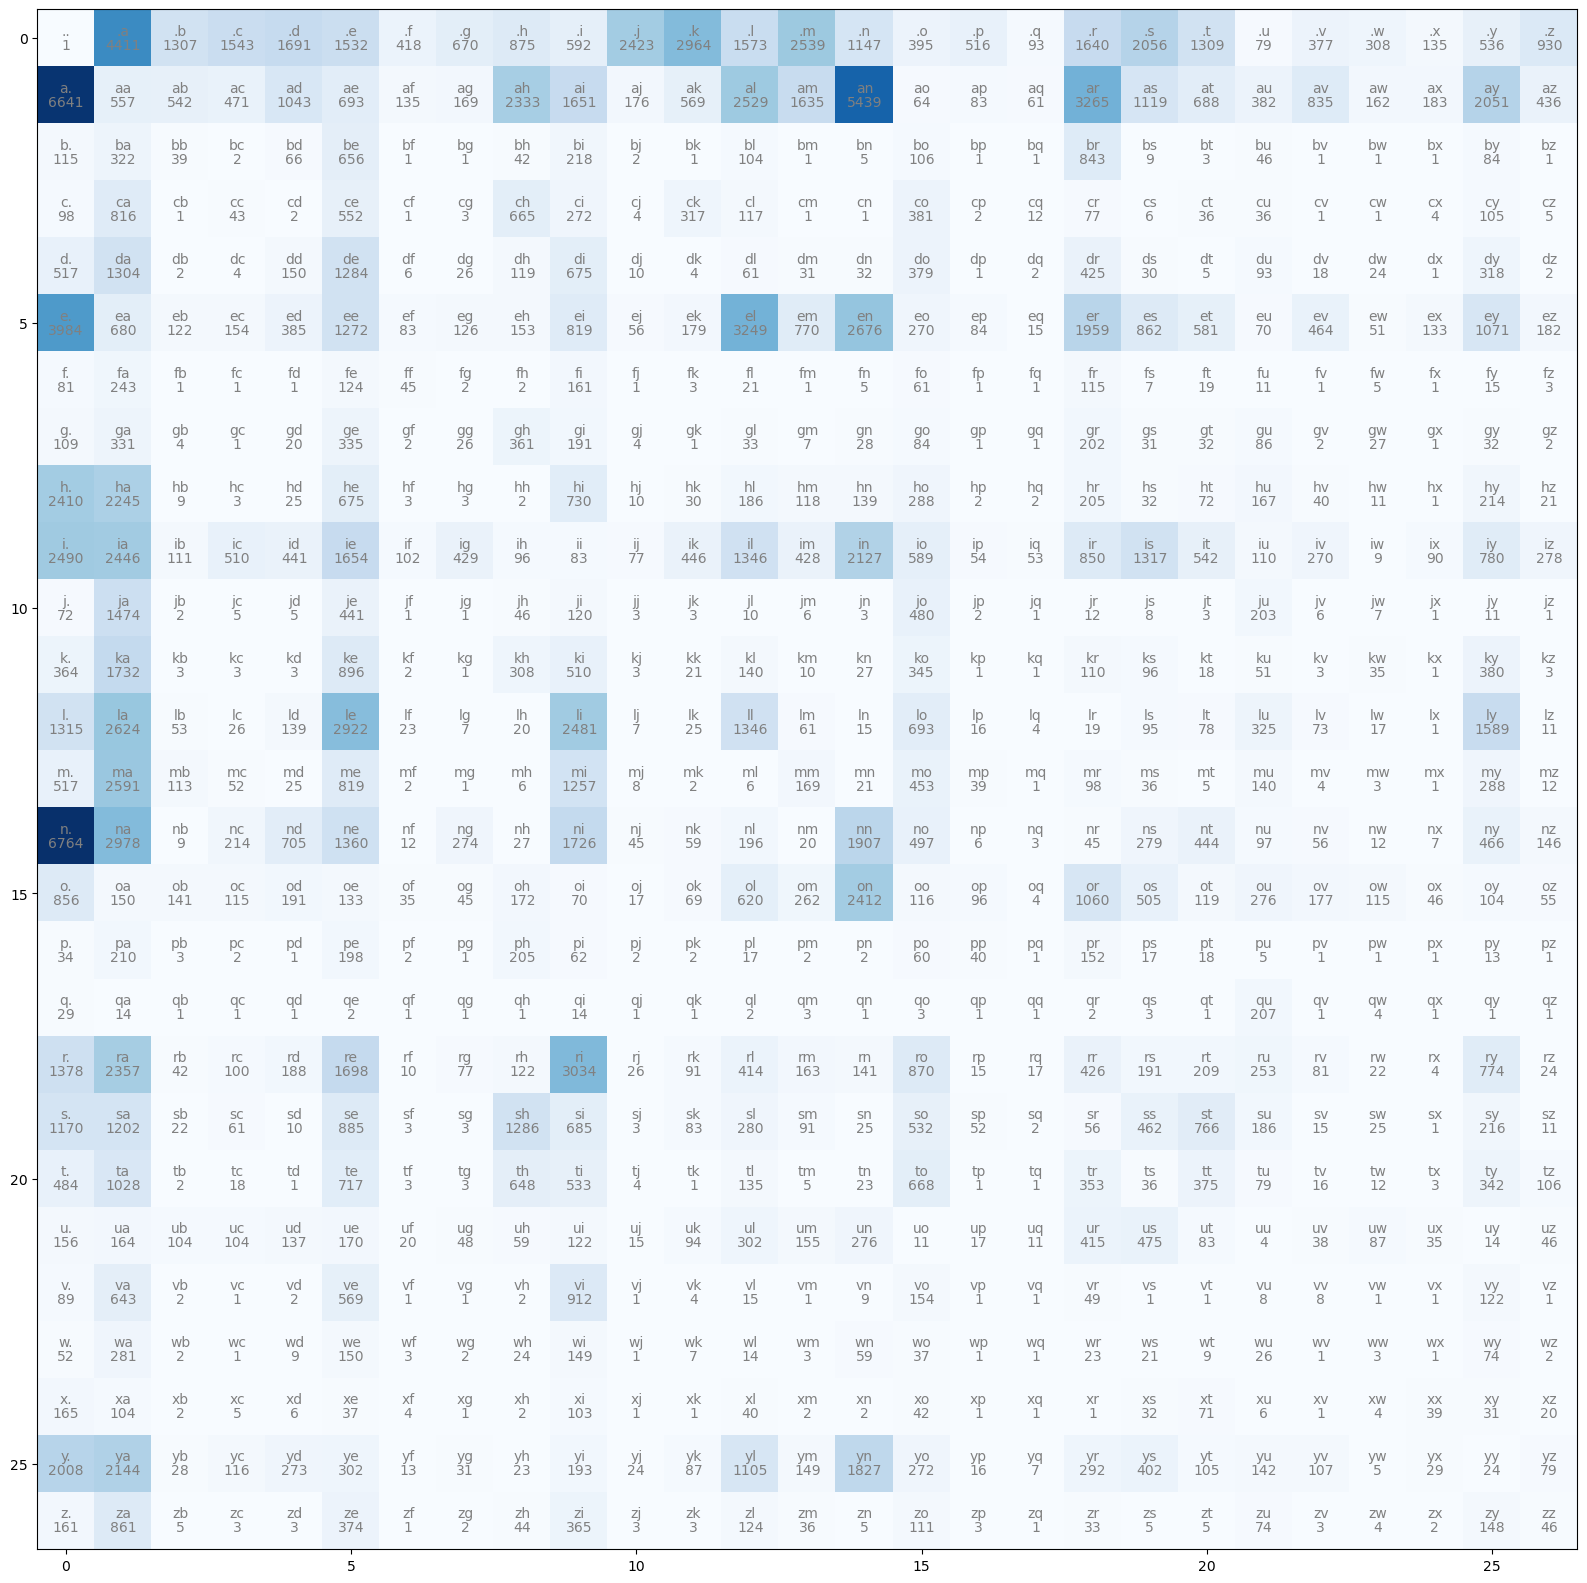

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")

In [13]:
p = N[0].float()
p /= p.sum()
p

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [15]:
ix = torch.multinomial(p, num_samples=1, replacement=True).item()
itos[ix]

's'

In [16]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [17]:
P[2]

tensor([0.0430, 0.1205, 0.0146, 0.0007, 0.0247, 0.2455, 0.0004, 0.0004, 0.0157,
        0.0816, 0.0007, 0.0004, 0.0389, 0.0004, 0.0019, 0.0397, 0.0004, 0.0004,
        0.3155, 0.0034, 0.0011, 0.0172, 0.0004, 0.0004, 0.0004, 0.0314, 0.0004])

In [18]:
for i in range(20):
    ix = 0
    name = '.'
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        name += itos[ix]
        if ix == 0:
            break
    print(name)

.brudle.
.jaizi.
.sto.
.s.
.kamah.
.meney.
.adove.
.m.
.dedy.
.si.
.ta.
.iane.
.ele.
.san.
.tynnra.
.tostysele.
.ja.
.pbame.
.ry.
.jah.


In [19]:
nll = 0
for name in names[:3]:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        prob = P[ch1stoi, ch2stoi]
        logprob = torch.log(prob)
        nll -= logprob
        print(f"{ch1+ch2} {prob:.4f} {-logprob:.4f}")
nll

.e 0.0478 3.0410
em 0.0377 3.2793
mm 0.0253 3.6753
ma 0.3885 0.9454
a. 0.1958 1.6305
.o 0.0123 4.3965
ol 0.0779 2.5526
li 0.1774 1.7293
iv 0.0152 4.1845
vi 0.3508 1.0476
ia 0.1380 1.9807
a. 0.1958 1.6305
.a 0.1376 1.9835
av 0.0246 3.7041
va 0.2473 1.3971
a. 0.1958 1.6305


tensor(38.8086)

## Trigram Model exercise

Now let us try to do trigram

In [124]:
trigrams = {}
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        trigrams[trigram] = trigrams.get(trigram,0) + 1

In [20]:
N3 = torch.ones((27,27,27), dtype=torch.int32) # Same as in bigram, to avoid inf NLL. Andrej uses (N+1) in P instead
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        ch3stoi = stoi[ch3]
        N3[ch1stoi,ch2stoi,ch3stoi] += 1

In [127]:
P3 = N3.float()
P3 /= P3.sum(2, keepdim=True)

In [128]:
P3[4,5]

tensor([0.0717, 0.0343, 0.0047, 0.0218, 0.0062, 0.0491, 0.0008, 0.0016, 0.0031,
        0.0078, 0.0094, 0.0125, 0.1691, 0.0663, 0.2479, 0.0164, 0.0000, 0.0016,
        0.1161, 0.0553, 0.0070, 0.0039, 0.0436, 0.0039, 0.0047, 0.0234, 0.0179])

In [134]:
for i in range(20):
    ix1 = 0
    p = P[ix1]
    ix2 = torch.multinomial(p, num_samples=1, replacement=True).item()
    name = '.'+itos[ix2]
    while True:
        p = P3[ix1,ix2]
        ix3 = torch.multinomial(p, num_samples=1, replacement=True).item()
        name += itos[ix3]
        if ix3 == 0:
            break
        ix1 = ix2
        ix2 = ix3
    print(name)

.gelden.
.ka.
.racey.
.allyxanna.
.lanend.
.anin.
.emon.
.kora.
.crue.
.kariah.
.metum.
.naleres.
.mie.
.mon.
.belypto.
.thun.
.no.
.ko.
.amar.
.vand.


In [132]:
nll = 0
for name in names[:3]:
    chs = ['.'] + list(name) + ['.']
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        ch1stoi = stoi[ch1]
        ch2stoi = stoi[ch2]
        ch3stoi = stoi[ch3]
        prob = P3[ch1stoi, ch2stoi, ch3stoi]
        logprob = torch.log(prob)
        nll -= logprob
        print(f"{ch1+ch2+ch3} {prob:.4f} {-logprob:.4f}")
nll

.em 0.1881 1.6707
emm 0.1300 2.0399
mma 0.4286 0.8473
ma. 0.0672 2.7004
.ol 0.2640 1.3320
oli 0.1115 2.1940
liv 0.0218 3.8270
ivi 0.2900 1.2380
via 0.1614 1.8241
ia. 0.3693 0.9961
.av 0.0551 2.8986
ava 0.1930 1.6448
va. 0.1449 1.9320


tensor(25.1449)

## Making a bigram neural network

In [21]:
# creating a input output pair that we will then feed to the NN
xs, ys = [], []

for name in names[:1]:
    chs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [23]:
ys

tensor([ 5, 13, 13,  1,  0])

In [6]:
import torch.nn.functional as F

In [28]:
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float() # One_hot does not come with a dtype option so we need to cast it to then use in the NN

xenc.shape

torch.Size([5, 27])

In [32]:
W = torch.randn((27,12)) 
xenc @ W

tensor([[ 7.0977e-01, -1.3216e-01, -3.5633e+00,  2.1430e-02, -1.3162e+00,
          2.6845e-01, -2.0188e-02,  6.6623e-01, -8.9256e-02,  2.0170e-01,
          2.8097e-02, -1.5785e-01],
        [-1.4226e+00, -2.0617e-01, -5.5797e-02,  3.1361e-01,  1.2775e+00,
         -1.5275e+00,  7.5046e-01,  1.5132e-01, -1.2399e+00,  3.3316e-01,
          3.5589e-01,  1.0616e+00],
        [-2.4318e-01, -2.8126e-01,  2.0229e+00, -2.5519e-03,  7.8574e-01,
          1.5979e+00,  3.3631e-01, -5.2824e-01,  1.6291e+00, -4.4571e-01,
          8.7869e-01, -8.5721e-01],
        [-2.4318e-01, -2.8126e-01,  2.0229e+00, -2.5519e-03,  7.8574e-01,
          1.5979e+00,  3.3631e-01, -5.2824e-01,  1.6291e+00, -4.4571e-01,
          8.7869e-01, -8.5721e-01],
        [-6.2913e-01,  2.2414e+00,  1.2862e+00,  1.6359e+00,  2.6657e-01,
         -1.4247e-01,  7.9442e-02, -1.2811e+00, -2.8571e+00,  4.0428e-01,
          1.6360e+00, -8.1947e-02]])

This needs some explanation because I think it is important. So first, what does a single neuron do? A single neuron takes a vector x, dots it with a weight vector w as x.w, and returns the number. That you define by using a (27,1) tensor. Actually pytorch can work with 5 input vectors as a batch, so the shape of the 5 27-dimensional vectors together will be (5, 27). You dot that with w which is (27,1) to get (5,1) as expected. Now instead if I have 12 neurons (taking the number to be different than 27 to make sense) then I can define a W which is (27,12). I dot it with (5,27) as (5,27) @ (27,12) which generates a (5, 12), which you can read as the first number representing the batch size of the samples (in this case 5) and the 12 different neurons being the second index

In [4]:
W = torch.randn((27,27), requires_grad=True) 
#xenc @ W

In [49]:
(xenc @ W).shape

torch.Size([5, 27])

In [50]:
(xenc @ W).exp()

tensor([[ 1.1989,  0.3692,  0.4976,  0.0528,  0.6036,  3.6511,  4.7901,  3.5433,
          6.5573,  1.0227,  1.5454,  0.5677,  4.7326,  0.3152,  0.2583,  0.4304,
          0.1824,  1.5445,  0.7330,  0.6744,  1.5940,  1.1923,  1.4741,  1.2962,
          0.1442,  1.3942,  0.7566],
        [ 1.6195,  3.9483, 10.2352,  0.1675,  1.2242,  1.4160,  0.3567,  1.8443,
          2.1165,  0.3086,  0.7036,  0.3482,  0.7115,  0.8187,  0.8206,  0.8217,
          0.6294,  2.3642,  1.6894,  1.3988,  2.6015,  1.2013,  1.3066,  3.6931,
          0.5141,  1.9341,  0.9173],
        [ 8.2416,  2.2379,  0.7181,  0.1454,  0.6678,  2.2130,  2.9224,  0.2950,
          0.4046,  0.5443,  5.5760,  0.5819,  1.0918,  1.0582,  2.7629,  0.2274,
          0.4916,  0.2936, 14.9750,  1.6930,  0.3033,  1.4127,  3.0580,  1.3405,
          2.4269,  2.3707,  0.4613],
        [ 8.2416,  2.2379,  0.7181,  0.1454,  0.6678,  2.2130,  2.9224,  0.2950,
          0.4046,  0.5443,  5.5760,  0.5819,  1.0918,  1.0582,  2.7629,  0.2274

In [51]:
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
probs

tensor([[0.0292, 0.0090, 0.0121, 0.0013, 0.0147, 0.0888, 0.1165, 0.0862, 0.1595,
         0.0249, 0.0376, 0.0138, 0.1151, 0.0077, 0.0063, 0.0105, 0.0044, 0.0376,
         0.0178, 0.0164, 0.0388, 0.0290, 0.0358, 0.0315, 0.0035, 0.0339, 0.0184],
        [0.0354, 0.0864, 0.2239, 0.0037, 0.0268, 0.0310, 0.0078, 0.0403, 0.0463,
         0.0068, 0.0154, 0.0076, 0.0156, 0.0179, 0.0180, 0.0180, 0.0138, 0.0517,
         0.0370, 0.0306, 0.0569, 0.0263, 0.0286, 0.0808, 0.0112, 0.0423, 0.0201],
        [0.1408, 0.0382, 0.0123, 0.0025, 0.0114, 0.0378, 0.0499, 0.0050, 0.0069,
         0.0093, 0.0953, 0.0099, 0.0187, 0.0181, 0.0472, 0.0039, 0.0084, 0.0050,
         0.2559, 0.0289, 0.0052, 0.0241, 0.0523, 0.0229, 0.0415, 0.0405, 0.0079],
        [0.1408, 0.0382, 0.0123, 0.0025, 0.0114, 0.0378, 0.0499, 0.0050, 0.0069,
         0.0093, 0.0953, 0.0099, 0.0187, 0.0181, 0.0472, 0.0039, 0.0084, 0.0050,
         0.2559, 0.0289, 0.0052, 0.0241, 0.0523, 0.0229, 0.0415, 0.0405, 0.0079],
        [0.0637, 0.0658,

In [44]:
probs[2].sum()

tensor(1.0000)

In [52]:
#Forward pass
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.2949, grad_fn=<NegBackward0>)

In [62]:
#Backward pass
W.grad = None
loss.backward()

In [56]:
W.grad.shape

torch.Size([27, 27])

In [63]:
W.data += (-0.1)*W.grad

In [60]:
W

tensor([[ 1.8079e-01, -9.9657e-01, -6.9825e-01, -2.9410e+00, -5.0516e-01,
          1.3133e+00,  1.5642e+00,  1.2633e+00,  1.8774e+00,  2.1966e-02,
          4.3452e-01, -5.6652e-01,  1.5522e+00, -1.1546e+00, -1.3539e+00,
         -8.4320e-01, -1.7017e+00,  4.3398e-01, -3.1103e-01, -3.9421e-01,
          4.6545e-01,  1.7534e-01,  3.8731e-01,  2.5881e-01, -1.9368e+00,
          3.3163e-01, -2.7923e-01],
        [ 6.3887e-01,  6.5083e-01, -3.8878e-01,  1.1017e+00,  6.7487e-01,
         -1.1092e+00,  3.2918e-01,  8.2631e-02, -7.0338e-02, -1.0352e+00,
         -6.9070e-01, -1.4440e-01,  1.4407e-02,  5.2771e-01, -7.6178e-01,
          1.3519e-01,  1.3593e-03,  5.6429e-01, -3.4109e-01,  4.9899e-01,
          3.7941e-01,  1.7496e-01, -3.2766e+00, -1.9529e-01, -1.5002e+00,
         -1.3292e+00, -1.7192e-01],
        [ 5.9018e-01,  6.2455e-01, -9.4864e-01,  4.2605e-01,  4.8901e-01,
         -5.5922e-01,  4.5189e-01,  2.9582e-02, -3.7505e-01, -1.0955e+00,
          1.8310e+00, -1.0201e+00,  2.19

In [9]:
#Forward pass
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys[:5]].log().mean()
loss

tensor(3.5000, grad_fn=<NegBackward0>)

Now let's try to set the entire pipeline up without looking at the video (but maybe referencing existing code in this notebook)

In [8]:
# Setting up the training data but now with the entire names file

xs, ys = [], []

for name in names[:10]: # Using a very small set because the kernel keeps crashing
    chs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

num_samples = len(xs)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xenc = F.one_hot(xs, num_classes=27).float()

In [11]:
num_samples

67

In [20]:
iterations = 10
learning_rate = -1
W = torch.randn((27,27), requires_grad=True)
for step in range(iterations):
    #forward pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdim=True)
    loss = -probs[torch.arange(num_samples), ys].log().mean()
    print(step,loss.item())

    #backprop
    W.grad = None
    loss.backward()

    #update weights
    W.data += learning_rate * W.grad

0 3.5273122787475586
1 3.497307300567627
2 3.4676783084869385
3 3.438429117202759
4 3.409566879272461
5 3.381098508834839
6 3.353031873703003
7 3.325376272201538
8 3.29814076423645
9 3.2713348865509033


The loss here probably decreases super rapidly because we are using a very small sample size. Need to figure out how to increase ram space allotted so that the kernel doesn't crash

Video was left off at 1:53:00

In [21]:
F.one_hot(xs, num_classes=27).dtype

torch.int64